In [1]:
import json
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import calplot
from datetime import datetime
import matplotlib as mpl

In [3]:
path = r'C:\Users\naomi\Documents\tesi 2025\prova ufficiale\dataset\\'

In [4]:
with open(path + 'vegetable_IG.json', 'r', encoding='utf-8') as f:
    dataset_veg = json.load(f)

In [5]:
with open(path + 'general_IG.json', 'r', encoding='utf-8') as f:
    dataset_general = json.load(f)

In [6]:
with open(path + 'healthy_IG.json', 'r', encoding='utf-8') as f:
    dataset_healthy = json.load(f)

In [7]:
def sentiment_bin(dataset):
    # Raccogli i sentiment score
    sentiment_scores = []
    for account, posts in dataset.items():
        for post_id, post_info in posts.items():
            for interaction in post_info.get('interactions_post', []):
                score = interaction.get('sentiment', {}).get('score')
                if isinstance(score, (int, float)):
                    sentiment_scores.append(score)
    
    # Crea i bin
    df = pd.DataFrame({'sentiment_score': sentiment_scores})
    sentiment_bins = pd.cut(df['sentiment_score'], bins=3)
    bin_edges = sentiment_bins.cat.categories
    sentiment_labels = ['negative', 'neutral', 'positive']
    return bin_edges

In [8]:
bin_edges_veg = sentiment_bin(dataset_veg)

In [9]:
bin_edges_healthy = sentiment_bin(dataset_healthy)

In [10]:
bin_edges_general = sentiment_bin(dataset_general)

In [11]:
def sentiment_bin(dataset):
    # Raccogli i sentiment score
    sentiment_scores = []
    for account, posts in dataset.items():
        for post_id, post_info in posts.items():
            for interaction in post_info.get('interactions_post', []):
                score = interaction.get('sentiment', {}).get('score')
                if isinstance(score, (int, float)):
                    sentiment_scores.append(score)
    
    # Crea i bin
    df = pd.DataFrame({'sentiment_score': sentiment_scores})
    sentiment_bins = pd.cut(df['sentiment_score'], bins=3)
    bin_edges = sentiment_bins.cat.categories
    sentiment_labels = ['negative', 'neutral', 'positive']
    return bin_edges
def sentiment_count(dataset, bin_edges):
    sentiment_counts_per_account = {}
    sentiment_counts_total = Counter()
    
    for account, posts in dataset.items():
        sentiment_counter = Counter()  # Deve essere inizializzato per ogni account
        
        for post_id, post_info in posts.items():
            for interaction in post_info.get('interactions_post', []):
                score = interaction.get('sentiment', {}).get('score')
                if score is None:
                    continue

                # Assegna il sentimento in base ai bin_edges
                if score in bin_edges[0]:
                    sentiment = 'negative'
                elif score in bin_edges[1]:
                    sentiment = 'neutral'
                elif score in bin_edges[2]:
                    sentiment = 'positive'

                sentiment_counter[sentiment] += 1
                sentiment_counts_total[sentiment] += 1
        
        sentiment_counts_per_account[account] = dict(sentiment_counter)
    
    return dict(sentiment_counts_total), sentiment_counts_per_account


In [12]:
veg_total_sentiment, veg_for_account_total_sentiment = sentiment_count(dataset_veg, bin_edges_veg)

In [13]:
list(veg_total_sentiment.keys())

['neutral', 'positive', 'negative']

In [13]:
healthy_total_sentiment, healthy_for_account_total_sentiment = sentiment_count(dataset_healthy, bin_edges_healthy)

In [14]:
general_total_sentiment, general_for_account_total_sentiment = sentiment_count(dataset_general, bin_edges_general)

In [16]:
lst = [healthy_total_sentiment, veg_total_sentiment, general_total_sentiment] #aggiungere  general_total_sentiment  per il futuro
values = []
sentiment = []
for data in lst:
    for key, value in data.items():
        values.append(value)
        sentiment.append(key)
dct = {}
dct['value'] = values
dct['sentiment'] = sentiment

In [17]:
data = pd.DataFrame(
    {
        "value": dct['value'],
        "sentiment": dct['sentiment'],
        "Account": [
            'Vegetable','Vegetable','Vegetable', 'Healthy','Healthy','Healthy' , 'General', 'General', 'General'
        ],
    }
)

cat_order = ['positive', 'negative', 'neutral']
data["sentiment"] = pd.Categorical(data["sentiment"], categories=cat_order, ordered=True)
data = data.sort_values(["sentiment", "value"], ascending=[True, False])

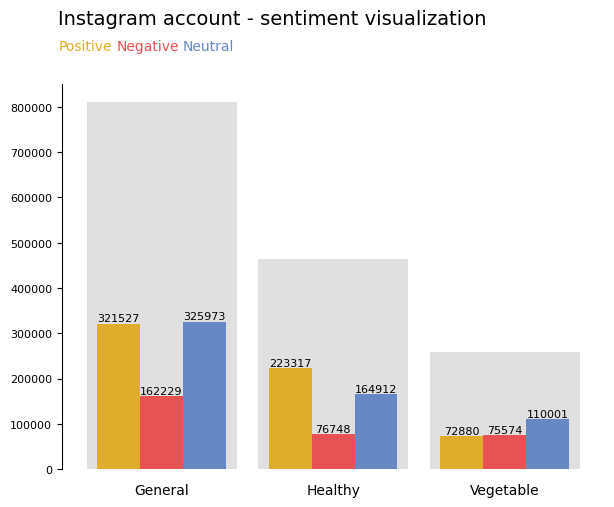

In [18]:
pivot_df = data.pivot(index="Account", columns="sentiment", values="value")
totals = pivot_df.sum(axis=1)

fig, ax = plt.subplots(figsize=(7, 5))

bar_width = 0.25
x = np.arange(len(pivot_df.index))
colors = ["#E0AC2B", "#E85252", "#6689C6"]

ax.bar(x, totals, width=bar_width * 3.5, color="#E0E0E0", zorder=0, label="Total")
for i, sub_cat in enumerate(pivot_df.columns):
    ax.bar(
        x + (i - 1) * bar_width,
        pivot_df[sub_cat],
        width=bar_width,
        label=sub_cat,
        zorder=1,
        color=colors[i],
    )

ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
#ax.set_yticks(list(range(0, 801, 100)))
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.tick_params(axis="x", size=0, pad=10)
ax.tick_params(axis="y", labelsize=8)

fig.text(x=0.12, y=1, s="Instagram account - sentiment visualization", size=14)
from highlight_text import fig_text  # assicurati di avere questa libreria installata

for i, sub_cat in enumerate(pivot_df.columns):
    values = pivot_df[sub_cat]
    ax.bar(
        x + (i - 1) * bar_width,
        values,
        width=bar_width,
        zorder=1,
        color=colors[i],
    )
    for j, val in enumerate(values):
        ax.text(
            x[j] + (i - 1) * bar_width,
            val + 5,
            f"{val:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
        )
fig_text(
    x=0.12,
    y=0.97,
    s="<Positive> <Negative> <Neutral>",
    highlight_textprops=[
        {"color": colors[0]},
        {"color": colors[1]},
        {"color": colors[2]},
    ],
)


plt.show()

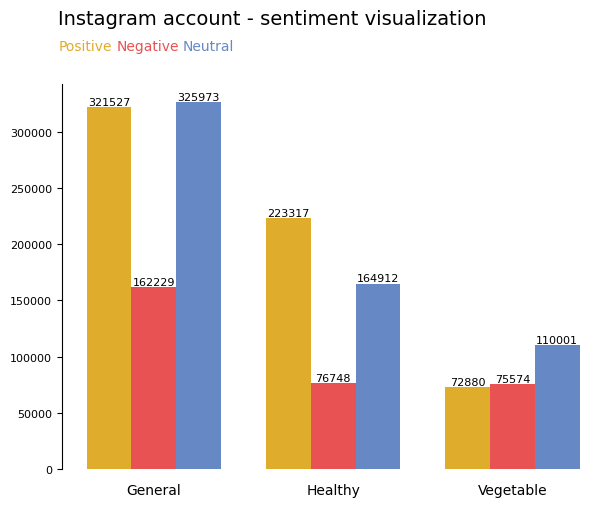

In [19]:
pivot_df = data.pivot(index="Account", columns="sentiment", values="value")
totals = pivot_df.sum(axis=1)

fig, ax = plt.subplots(figsize=(7, 5))

bar_width = 0.25
x = np.arange(len(pivot_df.index))
colors = ["#E0AC2B", "#E85252", "#6689C6"]



ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
#ax.set_yticks(list(range(0, 801, 100)))
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.tick_params(axis="x", size=0, pad=10)
ax.tick_params(axis="y", labelsize=8)

fig.text(x=0.12, y=1, s="Instagram account - sentiment visualization", size=14)
from highlight_text import fig_text  # assicurati di avere questa libreria installata

for i, sub_cat in enumerate(pivot_df.columns):
    values = pivot_df[sub_cat]
    ax.bar(
        x + (i - 1) * bar_width,
        values,
        width=bar_width,
        zorder=1,
        color=colors[i],
    )
    for j, val in enumerate(values):
        ax.text(
            x[j] + (i - 1) * bar_width,
            val + 5,
            f"{val:.0f}",
            ha="center",
            va="bottom",
            fontsize=8,
        )
fig_text(
    x=0.12,
    y=0.97,
    s="<Positive> <Negative> <Neutral>",
    highlight_textprops=[
        {"color": colors[0]},
        {"color": colors[1]},
        {"color": colors[2]},
    ],
)


plt.show()

In [20]:
def information(dataset, type_dataset):
    lst_account = list(dataset.keys())

    lst_single_user = set()
    user_number_comments = {}
    account_avg_comments = {}
    total_count_post = 0
    total_count_comments = 0
    
    for account, data in dataset.items():
        count_post = 0
        count_comment = 0
        for key, value in data.items():
            interactions = value['interactions_post']
            count_post += 1
            for interaction in interactions:
                count_comment += 1
                if interaction['user_name'] not in lst_account:
                    lst_single_user.add(interaction['user_name'])
                    user_number_comments[interaction['user_name']] = user_number_comments.get(interaction['user_name'], 0) + 1
        if count_post > 0:
            account_avg_comments[account] = count_comment / count_post
        else:
            account_avg_comments[account] = 0
            
        total_count_post += count_post
        total_count_comments += count_comment
        
    #Information about dataset
    print(f"Informations about {type_dataset} instagram dataset:")
    print(f"{'- Number of unique users':<30}: {len(lst_single_user)}")  #quanti utenti ci sono nel dataset ?
    print(f"{'- Total number of comments':<30}: {total_count_comments}")       #quanti commenti ho raccolto in tutto il dataset ?
    print(f"{'- Total number of posts':<30}: {total_count_post}")  
    print()

    print(f"{'Account':<30} {'Average comments for post':>25}")
    print("-" * 55)
    for account, avg in account_avg_comments.items():
        print(f"{account:<30} {avg:>25.2f}")
    print()
    
    sorted_d = dict(sorted(user_number_comments.items(), key=lambda item: item[1], reverse=True))
    counts = list(sorted_d.values())
    threshold = np.percentile(counts, 90)  # top 10%
    print(f"Soglia (percentile 90): {threshold}")
    mean = np.mean(counts)
    std = np.std(counts)
    threshold = mean + std
    print(f"Soglia = media + std = {threshold:.2f}")

In [21]:
veg_info = information(dataset_veg, 'vegetable')

Informations about vegetable instagram dataset:
- Number of unique users      : 139974
- Total number of comments    : 464977
- Total number of posts       : 5549

Account                        Average comments for post
-------------------------------------------------------
vegetable_24                                      275.27
vegetable_25                                       92.85
vegetable_26                                       28.27
vegetable_27                                       51.36
vegetable_28                                       18.97
vegetable_31                                       42.90
vegetable_34                                       25.89
vegetable_35                                       24.09
vegetable_11                                      146.75
vegetable_14                                       61.54
vegetable_17                                      102.74
vegetable_18                                       39.00
vegetable_19                           

In [22]:
healthy_info = information(dataset_healthy, 'healthy')

Informations about healthy instagram dataset:
- Number of unique users      : 116798
- Total number of comments    : 258455
- Total number of posts       : 3394

Account                        Average comments for post
-------------------------------------------------------
healthy_3                                          36.89
healthy_4                                          71.17
healthy_5                                          20.99
healthy_7                                          24.27
healthy_8                                         162.45
healthy_9                                          70.88
healthy_10                                         42.60
healthy_11                                         68.14
healthy_12                                         86.34
healthy_13                                         65.85
healthy_14                                         22.80
healthy_15                                         71.05
healthy_16                               

In [23]:
general_info = information(dataset_general, 'general')

Informations about general instagram dataset:
- Number of unique users      : 363644
- Total number of comments    : 809729
- Total number of posts       : 8197

Account                        Average comments for post
-------------------------------------------------------
general_46                                        119.03
general_47                                        158.58
general_44                                         33.68
general_54                                         20.13
general_34                                        182.64
general_37                                        146.25
general_38                                         50.99
general_2                                         237.13
general_5                                          26.42
general_9                                          27.75
general_10                                        120.53
general_12                                        219.18
general_14                               

In [24]:
def calendar_plot(dataset):
    
    # Forza un font presente sul sistema (es. DejaVu Sans)
    mpl.rcParams['font.family'] = 'DejaVu Sans'
    
    # 1. Raccogli tutte le date dei post
    date_counts = defaultdict(int)
    
    for account, posts in dataset.items():
        for post_id, post_data in posts.items():
            date_str = post_data.get('data', '')  # esempio '29-03-2023'
            try:
                # Converti la stringa in datetime (format: giorno-mese-anno)
                date_obj = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%SZ')
                date_counts[date_obj] += 1
            except ValueError:
                continue  # salta date malformate
    
    # 2. Crea una serie pandas con le date
    date_series = pd.Series(date_counts)
    
    # 3. Ordina la serie per data (facoltativo ma utile)
    date_series = date_series.sort_index()
    
    # 4. Visualizza il calendario
    calplot.calplot(
        date_series,
        suptitle='Post pubblicati per giorno',
        suptitle_kws={
            'x': 0.5,
            'y': 1.0,
            'fontname': 'DejaVu Sans',  # forza font nel titolo
            'fontsize': 10
        },
        cmap='YlGnBu',  # palette chiara consigliata
        yearlabels = True,
                    yearlabel_kws = {'fontsize': 15, 'color': 'blue'},
        textformat = '{:.0f}', textfiller = '-', textcolor = 'black'
    
    )
    plt.subplots_adjust(left=0.025)
    
    plt.savefig("calendar.png")
    plt.show()


In [18]:
def info_calendar_pubblication(dataset):
    
    # Raccogli tutte le date dei post e conta i post per anno
    post_per_year = defaultdict(int)
    
    for account, data in dataset.items():
        for key, value in data.items():
            date_str = value['data']
            try:
                date_obj = datetime.strptime(date_str, '%d-%m-%Y')
                year = date_obj.year  # estrai l'anno dalla data
                post_per_year[year] += 1  # incrementa il numero di post per quell'anno
            except ValueError:
                continue  # salta date malformate
    
    # 2. Crea un DataFrame con i dati aggregati per anno
    years = sorted(post_per_year.keys())
    post_counts = [post_per_year[year] for year in years]
    
    return years, post_counts


In [19]:
years_veg, post_counts_veg = info_calendar_pubblication(dataset_veg)
years_healthy, post_counts_healthy = info_calendar_pubblication(dataset_healthy)
years_general, post_counts_general = info_calendar_pubblication(dataset_general)
len(years_veg), len(years_healthy), len(years_general)

(13, 9, 7)

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

years = years_veg + years_healthy + years_general
post_counts = post_counts_veg + post_counts_healthy + post_counts_general

assert len(years) == len(post_counts), "Mismatch tra anni e conteggi"

accounts = (
    ['Vegetable'] * len(years_veg) +
    ['Healthy'] * len(years_healthy) +
    ['General'] * len(years_general)
)

data = pd.DataFrame({
    "year": years,
    "post_count": post_counts,
    "Account": accounts
})

cat_order = ['Vegetable', 'Healthy', 'General']
data["Account"] = pd.Categorical(data["Account"], categories=cat_order, ordered=True)

data = data.sort_values(["year", "post_count"], ascending=[True, False])


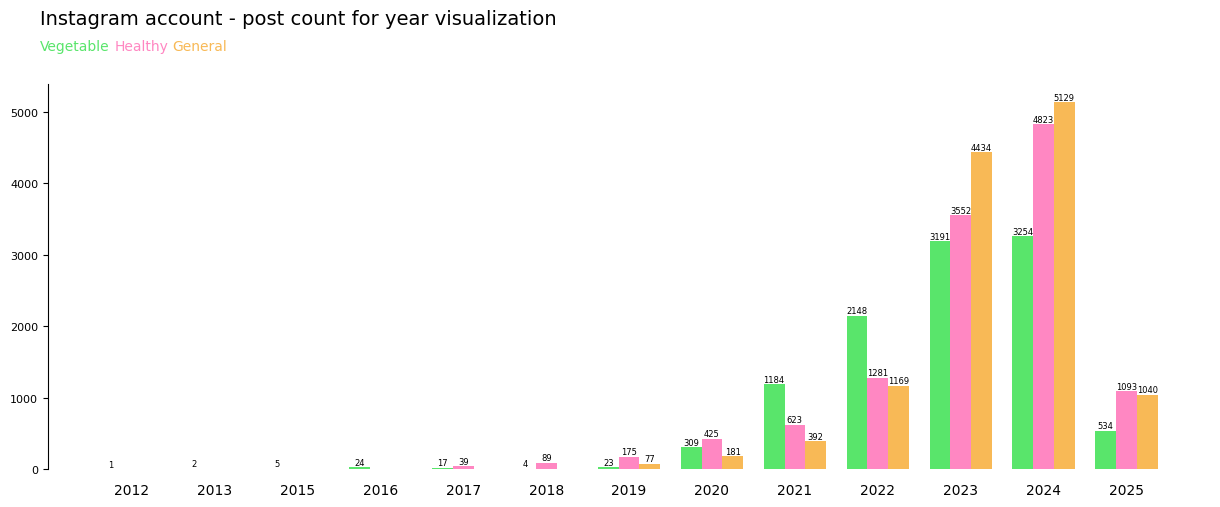

In [21]:
pivot_df = data.pivot(index="year", columns="Account", values="post_count")
totals = pivot_df.sum(axis=1)

fig, ax = plt.subplots(figsize=(15, 5))

bar_width = 0.25
x = np.arange(len(pivot_df.index))
colors = ["#59e56b", "#ff87c2", "#f8b956"]


ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index)
#ax.set_yticks(list(range(0, 801, 100)))
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.tick_params(axis="x", size=0, pad=10)
ax.tick_params(axis="y", labelsize=8)

fig.text(x=0.12, y=1, s="Instagram account - post count for year visualization", size=14)
from highlight_text import fig_text  # assicurati di avere questa libreria installata

for i, sub_cat in enumerate(pivot_df.columns):
    values = pivot_df[sub_cat]
    ax.bar(
        x + (i - 1) * bar_width,
        values,
        width=bar_width,
        zorder=1,
        color=colors[i],
    )
    for j, val in enumerate(values):
        ax.text(
            x[j] + (i - 1) * bar_width,
            val + 5,
            f"{val:.0f}",
            ha="center",
            va="bottom",
            fontsize=6,
        )
fig_text(
    x=0.12,
    y=0.97,
    s="<Vegetable> <Healthy> <General>",
    highlight_textprops=[
        {"color": colors[0]},
        {"color": colors[1]},
        {"color": colors[2]},
    ],
)


plt.show()

C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


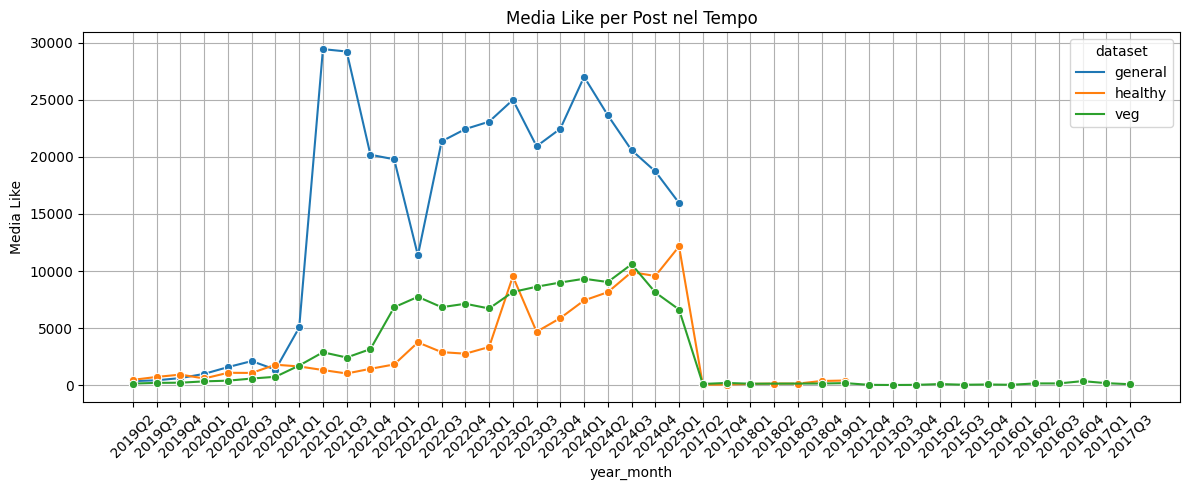

C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


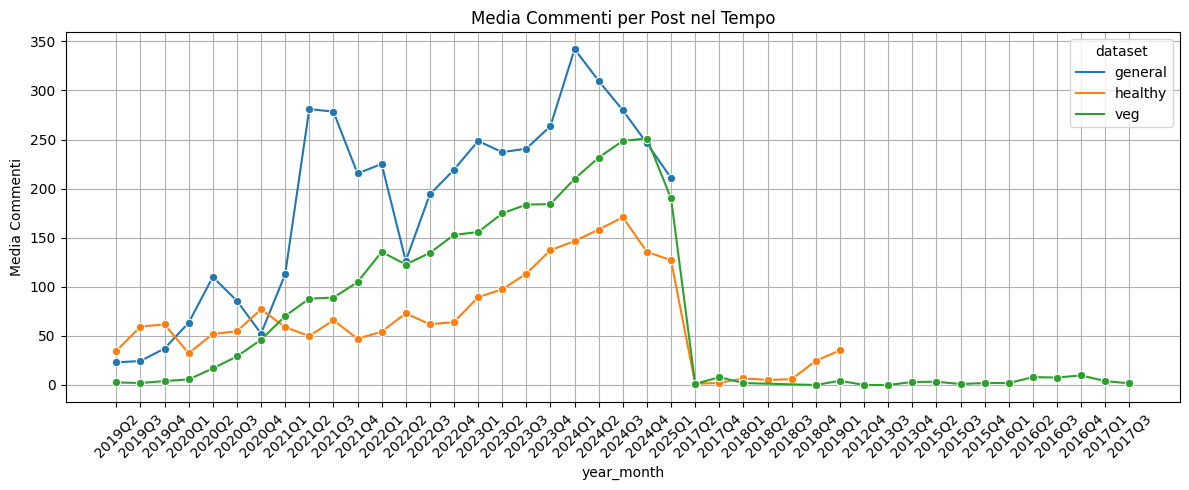

In [22]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

def extract_engagement_data(dataset, dataset_name):
    records = []
    for posts in dataset.values():
        for post in posts.values():
            date_str = post.get('data', '')
            try:
                date = datetime.strptime(date_str, '%d-%m-%Y')
            except ValueError:
                continue  # salta le date malformate
            
            likes = post.get('number_likes', 0)
            comments = post.get('number_comments', 0)
            
            records.append({
                'dataset': dataset_name,
                'date': date,
                'year': date.year,
                'month': date.month,
                'likes': likes,
                'comments': comments
            })
    return records

# Unisci i dati dei 3 dataset
all_records = []
all_records += extract_engagement_data(dataset_veg, 'veg')
all_records += extract_engagement_data(dataset_healthy, 'healthy')
all_records += extract_engagement_data(dataset_general, 'general')

# Crea DataFrame
df = pd.DataFrame(all_records)

# Crea colonna "year-month" per raggruppamento
df['year_month'] = df['date'].dt.to_period('Q').astype(str)

# Calcola medie per mese e dataset
monthly_engagement = df.groupby(['dataset', 'year_month']).agg({
    'likes': 'mean',
    'comments': 'mean'
}).reset_index()

# Plot - Media Like
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_engagement, x='year_month', y='likes', hue='dataset', marker='o')
plt.title('Media Like per Post nel Tempo')
plt.xticks(rotation=45)
plt.ylabel('Media Like')
plt.tight_layout()
plt.grid(True)
plt.show()

# Plot - Media Commenti
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_engagement, x='year_month', y='comments', hue='dataset', marker='o')
plt.title('Media Commenti per Post nel Tempo')
plt.xticks(rotation=45)
plt.ylabel('Media Commenti')
plt.tight_layout()
plt.grid(True)
plt.show()


C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


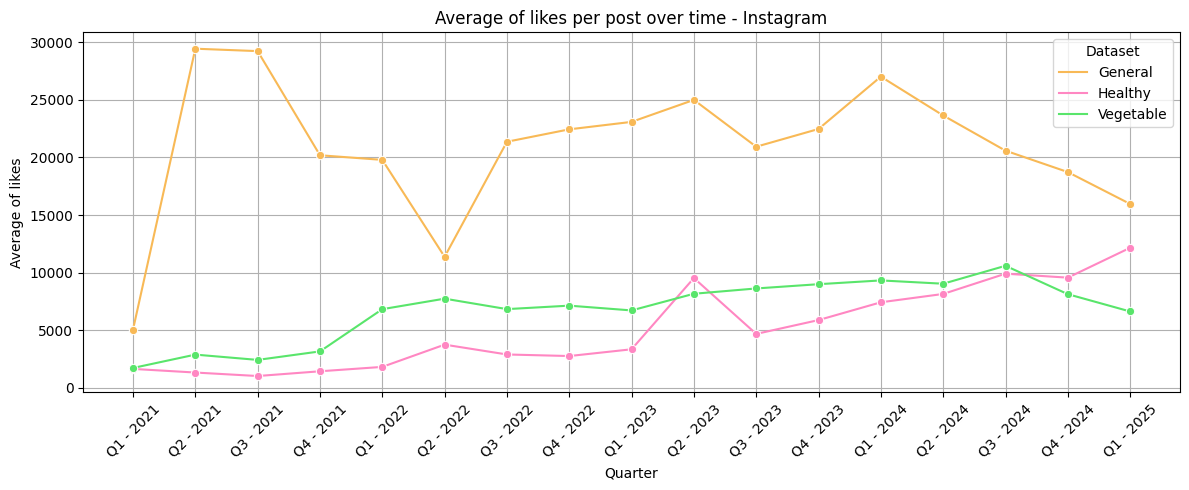

C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


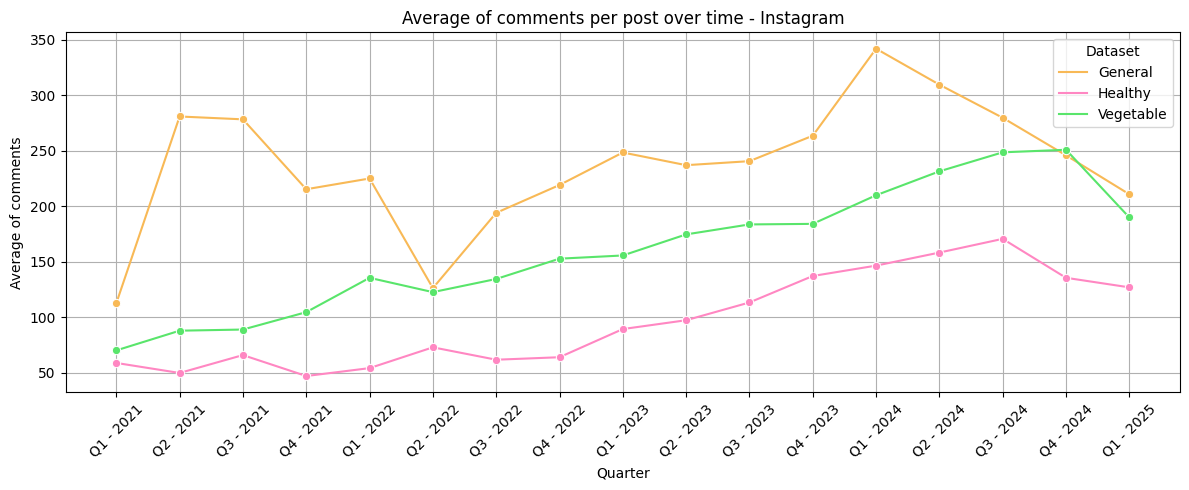

In [24]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

def extract_engagement_data(dataset, dataset_name):
    records = []
    for posts in dataset.values():
        for post in posts.values():
            date_str = post.get('data', '')
            try:
                date = datetime.strptime(date_str, '%d-%m-%Y')
            except ValueError:
                continue  # salta le date malformate
            
            likes = post.get('number_likes', 0)
            comments = post.get('number_comments', 0)
            
            records.append({
                'Dataset': dataset_name,
                'date': date,
                'likes': likes,
                'comments': comments
            })
    return records
palette = {
    'Vegetable': "#59e56b",      # verde
    'Healthy': "#ff87c2",  # rosa
    'General': "#f8b956"   # arancio
}

# Unisci i dati dei 3 dataset
all_records = []
all_records += extract_engagement_data(dataset_veg, 'Vegetable')
all_records += extract_engagement_data(dataset_healthy, 'Healthy')
all_records += extract_engagement_data(dataset_general, 'General')

# Crea DataFrame
df = pd.DataFrame(all_records)

# Aggiungi colonna year_month come oggetto Period
df['year_month'] = df['date'].dt.to_period('Q')

# Calcola medie per mese e dataset
monthly_engagement = df.groupby(['Dataset', 'year_month']).agg({
    'likes': 'mean',
    'comments': 'mean'
}).reset_index()

# 🔽 FILTRO: solo dal 2021 in poi
monthly_engagement = monthly_engagement[monthly_engagement['year_month'] >= pd.Period('2021-01', freq='Q')]

# Ordina per data e converti in stringa per etichette asse X
monthly_engagement = monthly_engagement.sort_values(by='year_month')
monthly_engagement['year_month_str'] = monthly_engagement['year_month'].apply(lambda p: f"Q{p.quarter} - {p.year}")

# Plot - Media Like
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_engagement, x='year_month_str', y='likes', hue='Dataset', marker='o', palette=palette)
plt.title('Average of likes per post over time - Instagram')
plt.xticks(rotation=45)
plt.ylabel('Average of likes')
plt.xlabel('Quarter')
plt.tight_layout()
plt.grid(True)
plt.show()

# Plot - Media Commenti
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_engagement, x='year_month_str', y='comments', hue='Dataset', marker='o', palette=palette)
plt.title('Average of comments per post over time - Instagram')
plt.xticks(rotation=45)
plt.ylabel('Average of comments')
plt.xlabel('Quarter')
plt.tight_layout()
plt.grid(True)
plt.show()


C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

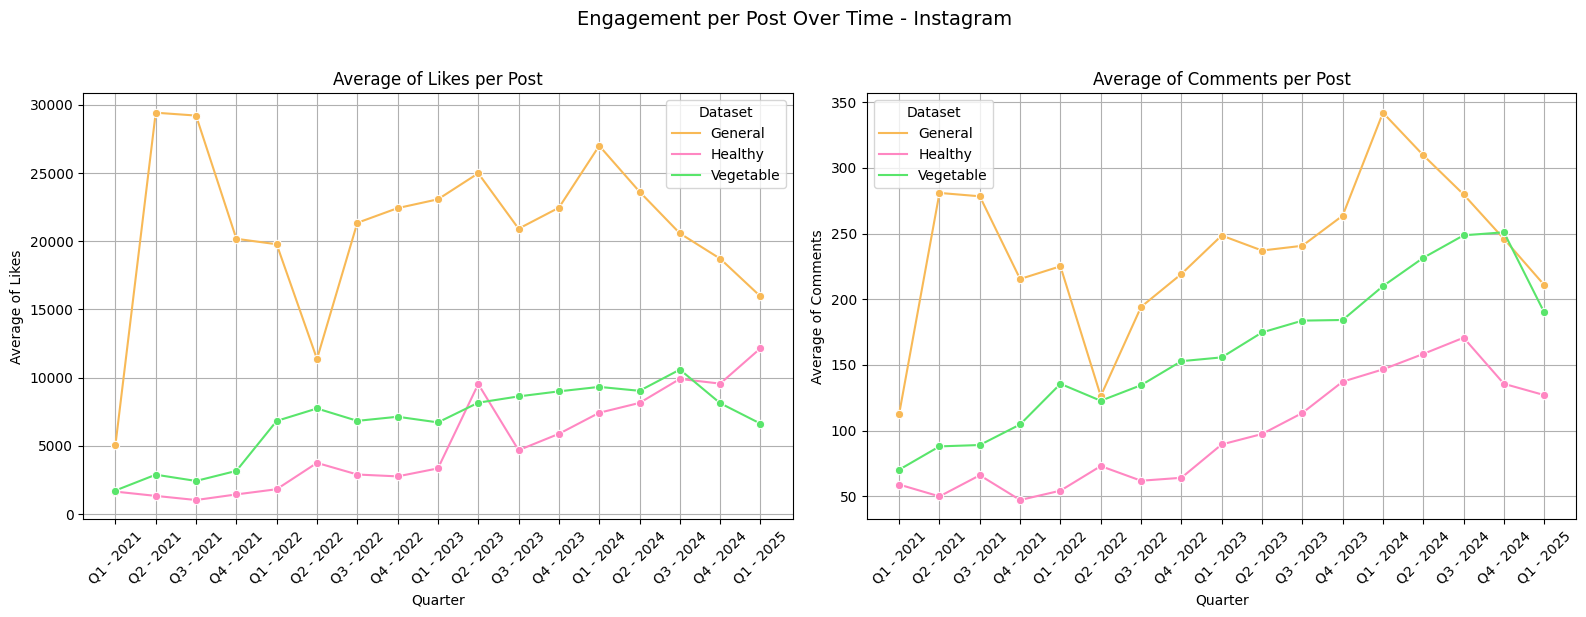

In [25]:
# Crea figura con due sottotrame affiancate
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Plot 1: Media Like
sns.lineplot(
    data=monthly_engagement,
    x='year_month_str',
    y='likes',
    hue='Dataset',
    marker='o',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title('Average of Likes per Post')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Average of Likes')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot 2: Media Commenti
sns.lineplot(
    data=monthly_engagement,
    x='year_month_str',
    y='comments',
    hue='Dataset',
    marker='o',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('Average of Comments per Post')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Average of Comments')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Layout ordinato e legenda unica opzionale
fig.suptitle('Engagement per Post Over Time - Instagram', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

def analyze_negative_sentiment_in_top_liked_posts(dataset, bin_edges, top_n=30):
    records = []
    
    for account, posts in dataset.items():
        for post_id, post_data in posts.items():
            likes = post_data.get('number_likes', 0)
            interactions = post_data.get('interactions_post', [])
            
            total_comments = len(interactions)
            negative_comments = 0
            
            for interaction in interactions:
                score = interaction.get('sentiment', {}).get('score')

                # Assegna il sentimento in base ai bin_edges
                if score in bin_edges[0]:
                    label = 'negative'
                elif score in bin_edges[1]:
                    label = 'neutral'
                elif score in bin_edges[2]:
                    label = 'positive'
                else:
                    label = 'neutral'  # fallback nel caso score sia None o fuori dai range

                if label == 'negative':
                    negative_comments += 1
            
            negative_ratio = (negative_comments / total_comments) if total_comments > 0 else 0
            
            records.append({
                'account': account,
                'post_id': post_id,
                'likes': likes,
                'total_comments': total_comments,
                'negative_comments': negative_comments,
                'negative_ratio': negative_ratio,
                'total_engagement': likes + total_comments  # <--- nuova voce
            })
    
    df = pd.DataFrame(records)
    
    # Prendi i top_n post per like
    top_posts = df.sort_values('likes', ascending=False).head(top_n)
    
    # Post con alta percentuale negativa tra i top
    high_negative_top_posts = top_posts[top_posts['negative_ratio'] >= 0.25]  # soglia 30%
    
    return df, top_posts, high_negative_top_posts


In [27]:
import pandas as pd

def analyze_negative_sentiment_in_top_liked_posts(dataset, bin_edges, top_n=30):
    records = []
    
    for account, posts in dataset.items():
        for post_id, post_data in posts.items():
            likes = post_data.get('number_likes', 0)
            interactions = post_data.get('interactions_post', [])
            
            total_comments = len(interactions)
            negative_comments = 0
            
            for interaction in interactions:
                score = interaction.get('sentiment', {}).get('score')

                # Assegna il sentimento in base ai bin_edges
                if score in bin_edges[0]:
                    label = 'negative'
                elif score in bin_edges[1]:
                    label = 'neutral'
                elif score in bin_edges[2]:
                    label = 'positive'
                else:
                    label = 'neutral'  # fallback nel caso score sia None o fuori dai range

                if label == 'negative':
                    negative_comments += 1
            
            negative_ratio = (negative_comments / total_comments) if total_comments > 0 else 0
            
            records.append({
                'account': account,
                'post_id': post_id,
                'likes': likes,
                'total_comments': total_comments,
                'negative_comments': negative_comments,
                'negative_ratio': negative_ratio,
                'total_engagement': likes + total_comments
            })
    
    df = pd.DataFrame(records)
    
    # Prendi i top_n post per like
    top_posts = df.sort_values('likes', ascending=False).head(top_n)
    
    # Post con alta percentuale negativa tra i top, ordinati per negative_ratio decrescente
    high_negative_top_posts = top_posts[top_posts['negative_ratio'] >= 0.25].sort_values('negative_ratio', ascending=False)
    
    return df, top_posts, high_negative_top_posts


In [28]:
df_all, df_top_likes, df_top_neg = analyze_negative_sentiment_in_top_liked_posts(dataset_general,bin_edges_general, top_n=30)

In [29]:
print("Top 30 posts per like:")
df_top_likes[['account', 'post_id', 'total_engagement', 'likes', 'total_comments', 'negative_comments', 'negative_ratio']]


Top 30 posts per like:


,account,post_id,total_engagement,likes,total_comments,negative_comments,negative_ratio
3732,general_26,233,2010673,2010605,68,17,0.250000
6647,general_12,152,1786160,1786087,73,18,0.246575
6711,general_12,216,1709734,1709659,75,14,0.186667
6665,general_12,170,1076717,1076637,80,12,0.150000
7115,general_19,120,1025245,1025173,72,20,0.277778
8159,general_21,164,779750,779690,60,9,0.150000
6623,general_12,128,779747,779687,60,9,0.150000
10447,general_17,25,735683,735614,69,7,0.101449
3773,general_26,274,541346,541291,55,3,0.054545
10522,general_17,100,516226,516156,70,9,0.128571


In [30]:
print("\nTop posts con più del 30% di commenti negativi:")
df_top_neg[['account', 'post_id', 'total_engagement', 'likes', 'total_comments', 'negative_comments', 'negative_ratio']]



Top posts con più del 30% di commenti negativi:


,account,post_id,total_engagement,likes,total_comments,negative_comments,negative_ratio
5996,general_7,1,362285,362193,92,43,0.467391
6106,general_7,111,390191,390099,92,36,0.391304
6707,general_12,212,500786,500700,86,33,0.383721
3981,general_26,482,409280,409198,82,29,0.353659
714,general_41,214,403505,403442,63,22,0.349206
4104,general_30,105,346975,346895,80,27,0.337500
7115,general_19,120,1025245,1025173,72,20,0.277778
6685,general_12,190,382031,381957,74,20,0.270270
3962,general_26,463,418410,418341,69,18,0.260870
3732,general_26,233,2010673,2010605,68,17,0.250000


In [31]:
df_top_neg.account.value_counts()

account
general_26    3
general_7     2
general_12    2
general_41    1
general_30    1
general_19    1
Name: count, dtype: int64

In [34]:
import pandas as pd

def aggregate_total_sentiment_per_account(dataset, bin_edges):
    """
    Analizza l'intero dataset e calcola per ogni account:
    - Totale dei likes
    - Totale dei commenti negativi, neutri e positivi
    - Totale dei commenti
    - Negative ratio complessivo
    """
    account_records = []

    for account, posts in dataset.items():
        total_likes = 0
        total_neg = 0
        total_neu = 0
        total_pos = 0
        total_comments = 0

        for post_id, post_data in posts.items():
            likes = post_data.get('number_likes', 0)
            interactions = post_data.get('interactions_post', [])

            neg = neu = pos = 0

            for interaction in interactions:
                score = interaction.get('sentiment', {}).get('score')

                if score in bin_edges[0]:
                    neg += 1
                elif score in bin_edges[1]:
                    neu += 1
                elif score in bin_edges[2]:
                    pos += 1

            total_likes += likes
            total_neg += neg
            total_neu += neu
            total_pos += pos
            total_comments += neg + neu + pos

        negative_ratio = (total_neg / total_comments) if total_comments > 0 else 0

        account_records.append({
            'account': account,
            'total_likes': total_likes,
            'negative_comments': total_neg,
            'neutral_comments': total_neu,
            'positive_comments': total_pos,
            'total_comments': total_comments,
            'negative_ratio': negative_ratio
        })

    return pd.DataFrame(account_records)


In [82]:
import matplotlib.pyplot as plt
import numpy as np

def plot_stacked_comments_percentage(df_grouped):
    # Ordina per negative_ratio crescente
    df_grouped = df_grouped.sort_values('negative_ratio', ascending=False).reset_index(drop=True)

    x = range(len(df_grouped))
    accounts = df_grouped['account']

    total_comments = df_grouped['negative_comments'] + df_grouped['neutral_comments'] + df_grouped['positive_comments']
    neg_pct = df_grouped['negative_comments'].to_numpy() / total_comments.to_numpy()
    neu_pct = df_grouped['neutral_comments'].to_numpy() / total_comments.to_numpy()
    pos_pct = df_grouped['positive_comments'].to_numpy() / total_comments.to_numpy()

    fig, ax = plt.subplots(figsize=(14, 6))

    bar1 = ax.bar(x, neg_pct, label='Negative', color='#ff4c4c')
    bar2 = ax.bar(x, neu_pct, bottom=neg_pct, label='Neutral', color='#ffd966')
    bar3 = ax.bar(x, pos_pct, bottom=neg_pct + neu_pct, label='Positive', color='#88d498')

    ax.set_ylabel('Percentage of comments')
    ax.set_xlabel('Accounts')
    ax.set_title('Percentage distribution of sentiments per Instagram account')
    ax.set_xticks(x)
    ax.set_xticklabels(accounts, rotation=90)
    ax.set_ylim(0, 1)

    # Secondo asse: ratio negativo (resta percentuale)
    ax2 = ax.twinx()
    ax2.plot(x, df_grouped['negative_ratio'], color='red', marker='o', label='Negative Ratio')
    ax2.set_ylabel('Negative Ratio')
    ax2.set_ylim(0, 1)
    ax2.axhline(0.3, linestyle='--', color='red', alpha=0.3)

    # Legenda combinata
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()


In [48]:
df_stacked_general = aggregate_total_sentiment_per_account(dataset_general, bin_edges_general)

In [49]:
df_stacked_veg = aggregate_total_sentiment_per_account(dataset_veg, bin_edges_veg)

In [83]:
df_stacked_healthy = aggregate_total_sentiment_per_account(dataset_healthy, bin_edges_healthy)

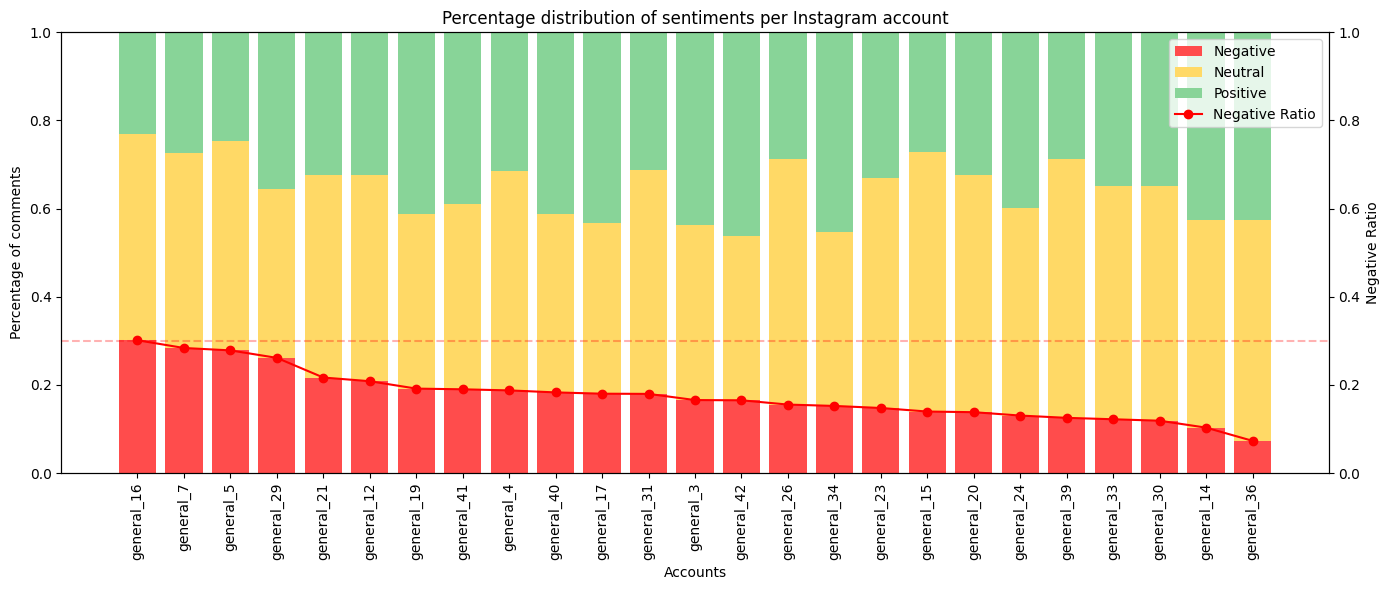

In [84]:
plot_stacked_comments_percentage(df_stacked_general)

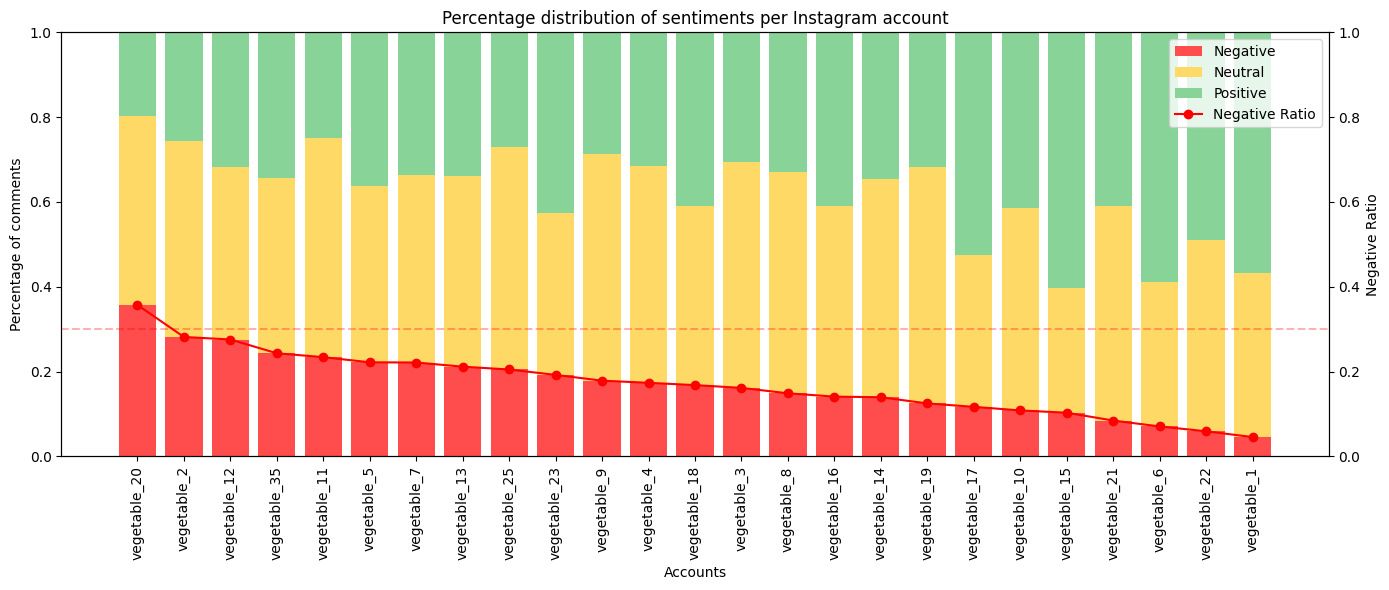

In [85]:
plot_stacked_comments_percentage(df_stacked_veg)

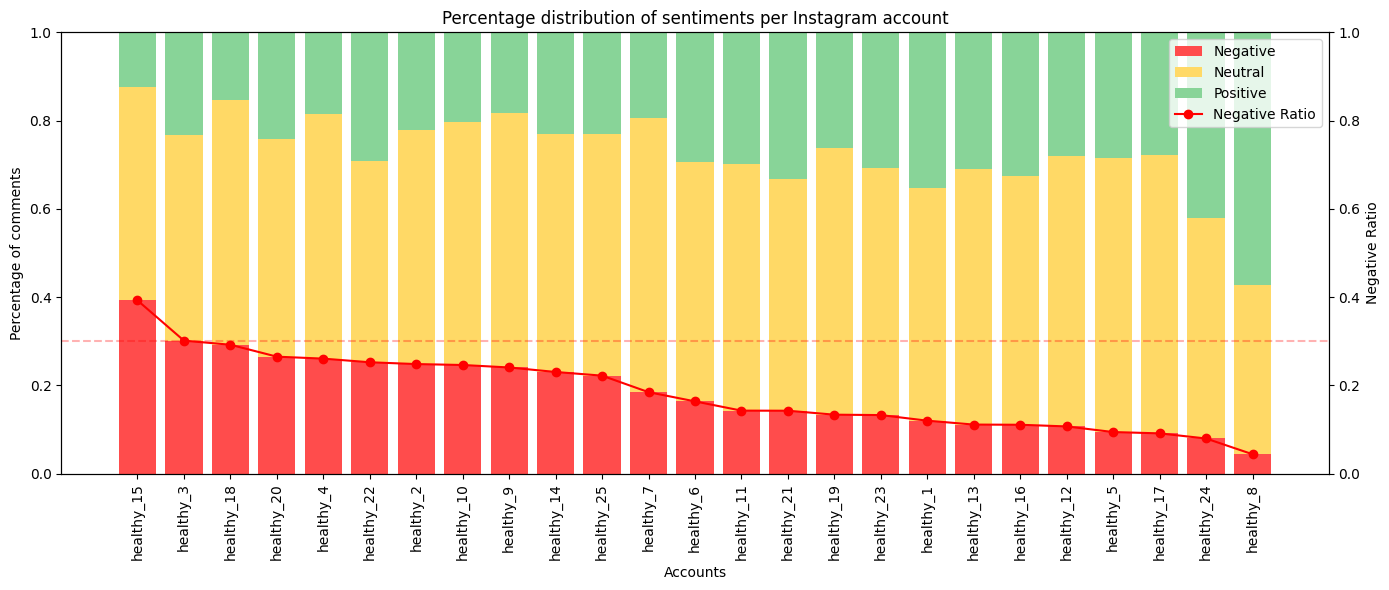

In [86]:
plot_stacked_comments_percentage(df_stacked_healthy)

In [59]:
def generate_emotion_summary_from_dataset(dataset):
    emotion_counts = {}
    negative_emotions = {'anger', 'sadness', 'fear'}
    
    for account, posts in dataset.items():
        if account not in emotion_counts:
            emotion_counts[account] = {}

        total_comments = 0
        negative_comments = 0

        for post_id, post_data in posts.items():
            interactions = post_data.get('interactions_post', [])
            for interaction in interactions:
                emotion_scores = interaction.get('emotion', {})
                if emotion_scores:
                    max_emotion = max(emotion_scores, key=emotion_scores.get)
                    total_comments += 1

                    # Conta il commento come negativo
                    if max_emotion in negative_emotions:
                        negative_comments += 1

                    # Conta l'emozione
                    emotion_counts[account][max_emotion] = emotion_counts[account].get(max_emotion, 0) + 1

        # Salva il ratio dei commenti negativi
        emotion_counts[account]['negative_ratio'] = (
            negative_comments / total_comments if total_comments > 0 else 0
        )

    # Trasforma in DataFrame
    df_emotions = pd.DataFrame.from_dict(emotion_counts, orient='index').fillna(0).reset_index()
    df_emotions = df_emotions.rename(columns={'index': 'account'})

    return df_emotions


In [87]:
import matplotlib.pyplot as plt
import numpy as np

def plot_stacked_emotions_percentage(df_grouped_emotions, sort_by=None):
    """
    df_grouped_emotions: DataFrame con colonne 'account', 'joy', 'anger', 'sadness', ... (emozioni)
    sort_by: facoltativo, colonna su cui ordinare (es. 'disgust', 'anger')
    """
    # Ordine desiderato dal basso verso l'alto
    desired_order = ['anger', 'sadness', 'fear', 'joy']
    emotion_colors = {
        'joy': 'gold',
        'sadness': 'royalblue',
        'anger': 'crimson',
        'fear': 'orchid'
    }

    # Filtra le colonne presenti nell'ordine desiderato (alcune potrebbero non esserci)
    emotion_columns = [col for col in desired_order if col in df_grouped_emotions.columns]

    # Calcola totale emozioni per account
    total_emotions = df_grouped_emotions[emotion_columns].sum(axis=1)

    # Calcola le percentuali
    emotion_percentages = df_grouped_emotions[emotion_columns].div(total_emotions, axis=0)
    emotion_percentages['account'] = df_grouped_emotions['account']

    # Ordina se richiesto
    if sort_by and sort_by in emotion_columns:
        emotion_percentages = emotion_percentages.sort_values(by=sort_by, ascending=False).reset_index(drop=True)

    # Plot
    fig, ax = plt.subplots(figsize=(14, 6))
    x = range(len(emotion_percentages))
    bottom = np.zeros(len(emotion_percentages))

    for emotion in emotion_columns:
        values = emotion_percentages[emotion].to_numpy()
        ax.bar(x, values, bottom=bottom, label=emotion, color=emotion_colors.get(emotion, 'gray'))
        bottom += values

    ax.set_ylabel('Percentage of comments')
    ax.set_xlabel('Accounts')
    ax.set_title('Percentage distribution of emotions per Instagram account')
    ax.set_xticks(x)
    ax.set_xticklabels(emotion_percentages['account'], rotation=90)
    ax.set_ylim(0, 1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

    
    plt.tight_layout()
    plt.show()


In [66]:
df_grouped_emotions_general = generate_emotion_summary_from_dataset(dataset_general)
df_grouped_emotions_veg = generate_emotion_summary_from_dataset(dataset_veg)
df_grouped_emotions_healthy = generate_emotion_summary_from_dataset(dataset_healthy)

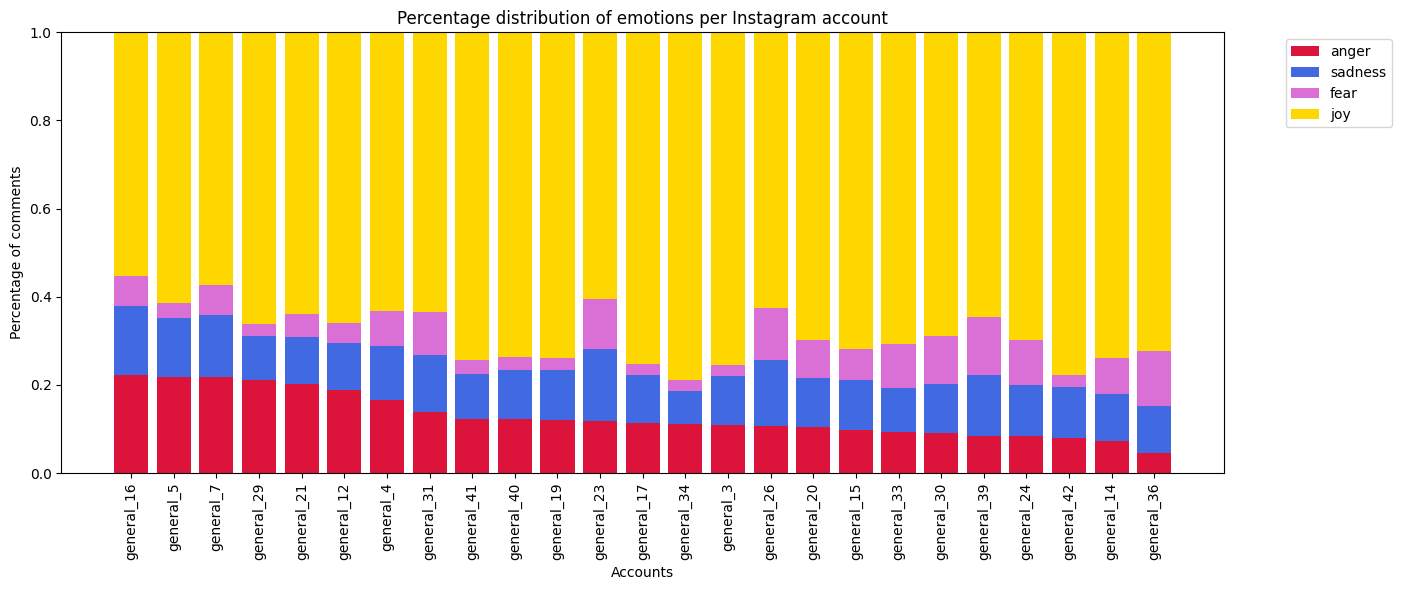

In [88]:
plot_stacked_emotions_percentage(df_grouped_emotions_general, sort_by = 'anger')

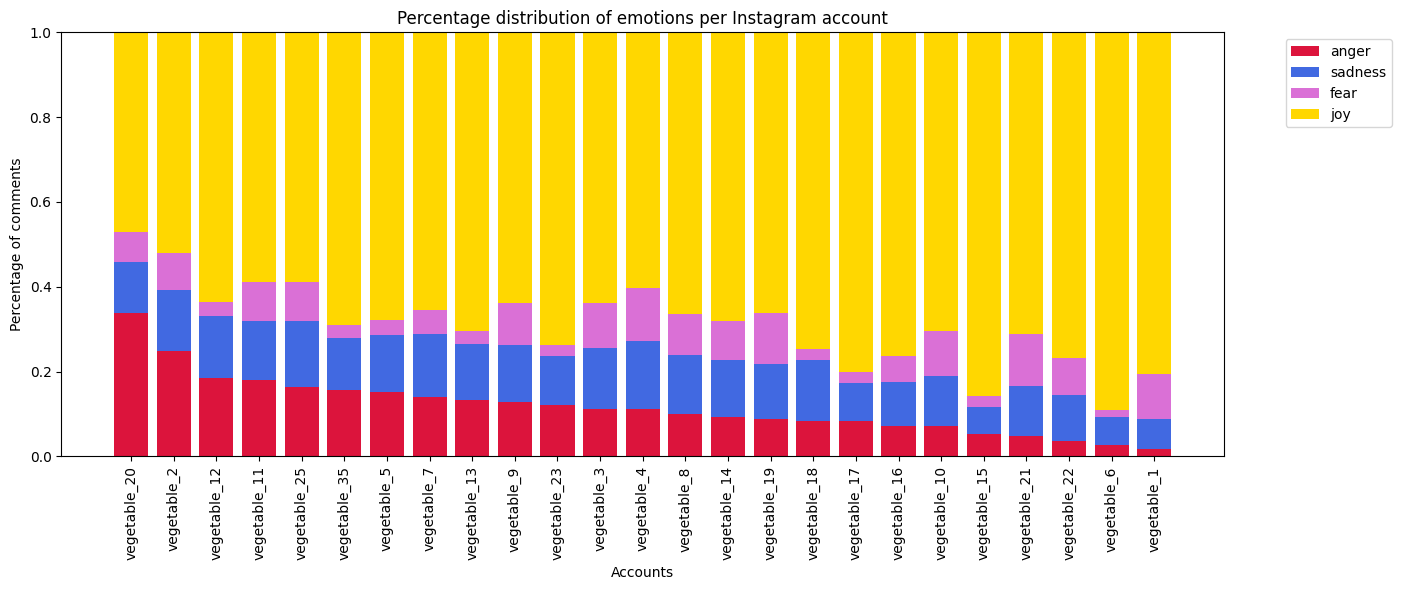

In [89]:
plot_stacked_emotions_percentage(df_grouped_emotions_veg, sort_by = 'anger')

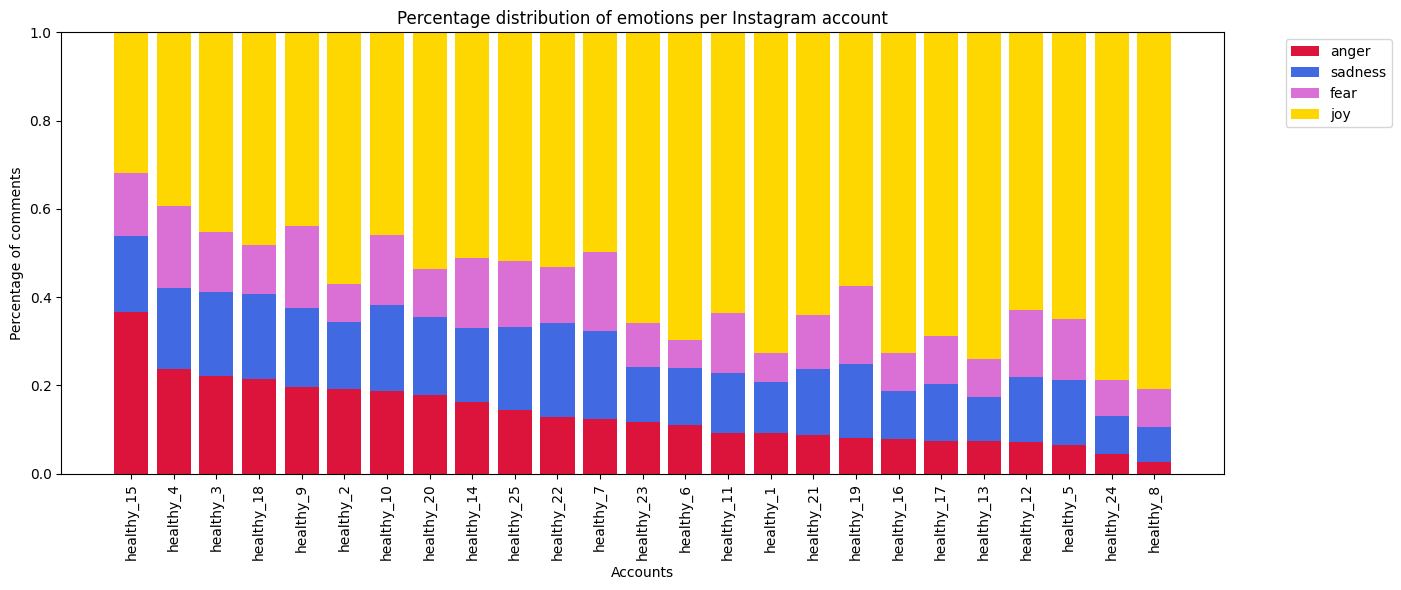

In [90]:
plot_stacked_emotions_percentage(df_grouped_emotions_healthy, sort_by = 'anger')